### Analysis of factors that affect student's quality of academic performance

1- Age
2- Gender
3 - Geographical belongingness
4 - Ethnicity
5 - Marital status
6 - socioeconomic status (SES)
7 - parents’ education level
8 - parental profession
9 - language
10 - income
11 - religious affiliations


# Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# Carregando os dados

### Dataset information:



In [5]:
data = pd.read_csv("../../dataset/MICRODADOS_ENEM_2018.csv", sep=';', encoding='cp1252')

# Exploração inicial dos dados

In [6]:
data.shape

(5513747, 137)

In [7]:
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180008202043,2018,5300108,Brasília,53,DF,44.0,M,1.0,1,...,A,A,A,A,A,A,A,A,B,A
1,180007197856,2018,2111102,São João dos Patos,21,MA,23.0,F,0.0,3,...,A,B,A,A,B,A,A,A,A,A
2,180008517434,2018,3530607,Mogi das Cruzes,35,SP,23.0,F,0.0,1,...,A,B,A,A,B,B,B,B,A,A
3,180007661228,2018,2916401,Itapetinga,29,BA,26.0,F,0.0,3,...,A,B,B,A,C,A,B,B,A,A
4,180008787987,2018,2918100,Jeremoabo,29,BA,20.0,M,0.0,0,...,A,B,A,A,B,A,B,B,B,A


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513747 entries, 0 to 5513746
Columns: 137 entries, NU_INSCRICAO to Q027
dtypes: float64(30), int64(64), object(43)
memory usage: 5.6+ GB


In [9]:
data.isna().sum()

NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
CO_UF_RESIDENCIA           0
                          ..
Q023                       0
Q024                       0
Q025                       0
Q026                       4
Q027                       0
Length: 137, dtype: int64

In [10]:
data.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5.513747e+06,5513747.0,5.513747e+06,5.513747e+06,5.513650e+06,5.296110e+06,5.513747e+06,5.513747e+06,5.327964e+06,5.327964e+06,...,3.905099e+06,5.513747e+06,4.148264e+06,4.148264e+06,4.148264e+06,4.148264e+06,4.148264e+06,4.148264e+06,4.148264e+06,5.513747e+06
mean,1.800104e+11,2018.0,3.114727e+06,3.099416e+01,2.237222e+01,1.197082e-01,2.126976e+00,1.038818e+00,3.082742e+06,3.067302e+01,...,5.354056e+02,5.330678e-01,1.105180e+00,1.217063e+02,1.015516e+02,9.700069e+01,1.169476e+02,7.147451e+01,5.086806e+02,3.896592e+00
std,1.917637e+06,0.0,9.930315e+05,9.901276e+00,7.594597e+00,3.752605e-01,1.017869e+00,2.324415e-01,9.758309e+05,9.724860e+00,...,1.031512e+02,4.989054e-01,6.928336e-01,3.141267e+01,4.964719e+01,4.707275e+01,3.526688e+01,5.228969e+01,1.874965e+02,1.508600e+00
min,1.800072e+11,2018.0,1.100015e+06,1.100000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100015e+06,1.100000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.800088e+11,2018.0,2.408102e+06,2.400000e+01,1.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.408003e+06,2.400000e+01,...,4.553000e+02,0.000000e+00,1.000000e+00,1.200000e+02,4.000000e+01,4.000000e+01,1.000000e+02,4.000000e+01,3.600000e+02,3.000000e+00
50%,1.800104e+11,2018.0,3.136702e+06,3.100000e+01,1.900000e+01,0.000000e+00,2.000000e+00,1.000000e+00,3.123205e+06,3.100000e+01,...,5.166000e+02,1.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+01,5.200000e+02,4.000000e+00
75%,1.800120e+11,2018.0,3.550308e+06,3.500000e+01,2.400000e+01,0.000000e+00,3.000000e+00,1.000000e+00,3.550308e+06,3.500000e+01,...,6.007000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.200000e+02,1.200000e+02,1.400000e+02,1.200000e+02,6.200000e+02,5.000000e+00
max,1.800140e+11,2018.0,5.300108e+06,5.300000e+01,9.800000e+01,3.000000e+00,5.000000e+00,4.000000e+00,5.300108e+06,5.300000e+01,...,9.961000e+02,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


### Listing columns

In [11]:
data.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

## Factor 1: Geographical belongingness

### Conferindo cidade e estado de origem dos participantes

In [12]:
data[['SG_UF_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA']]

,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
0,DF,Brasília
1,MA,São João dos Patos
2,SP,Mogi das Cruzes
3,BA,Itapetinga
4,BA,Jeremoabo
...,...,...
5513742,RJ,Rio de Janeiro
5513743,AM,Manaus
5513744,SP,São Paulo
5513745,SP,Campinas


### Conferindo Estados que tem pelo menos 1 participante

In [13]:
data['SG_UF_RESIDENCIA'].unique()

array(['DF', 'MA', 'SP', 'BA', 'PB', 'MG', 'PI', 'CE', 'MT', 'RN', 'TO',
       'RS', 'RR', 'GO', 'PR', 'MS', 'RJ', 'PE', 'ES', 'SC', 'SE', 'PA',
       'AC', 'RO', 'AM', 'AL', 'AP'], dtype=object)

### Total de alunos por Unidade Federativa

To-do: Fazer uma mapa com os quantitaivos (ou percentuais) de alunos por Estado ou por região

In [14]:
data['SG_UF_RESIDENCIA'].value_counts()

SP    934174
MG    587471
BA    401328
RJ    382078
CE    329406
PE    304302
PA    283861
RS    243555
PR    236533
MA    218462
GO    191029
PB    152049
RN    124039
SC    123933
AM    123755
PI    118350
ES    112173
DF    104531
MT     96762
AL     89670
SE     74633
MS     72319
RO     62266
TO     55145
AP     40109
AC     37785
RR     14029
Name: SG_UF_RESIDENCIA, dtype: int64

C:\Users\cof2\anaconda3\envs\ufpe\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Participantes')

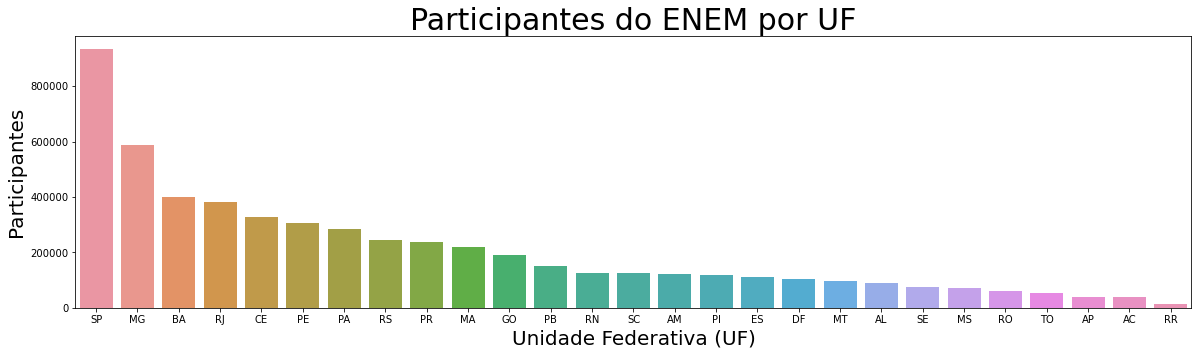

In [15]:
# pandas
# data['SG_UF_RESIDENCIA'].value_counts().plot.bar(figsize=(20,5))
# plt.title('Distribuição de Participantes do ENEM por UF', fontsize=30)
# plt.xlabel('UF', fontsize=20)
# plt.ylabel('Participantes', fontsize=20)

plt.figure(figsize=(20,5))
sns.barplot(data['SG_UF_RESIDENCIA'].value_counts().index,
            data['SG_UF_RESIDENCIA'].value_counts().values)
plt.title('Participantes do ENEM por UF', fontsize=30)
plt.xlabel('Unidade Federativa (UF)', fontsize=20)
plt.ylabel('Participantes', fontsize=20)

### Vemos que SP é o Estado com maior número de alunos. E Roraima tem o menor número de alunos 

### Plotando a proporção de participantes do ENEM por UF do total de participantes

Text(0, 0.5, 'Participantes')

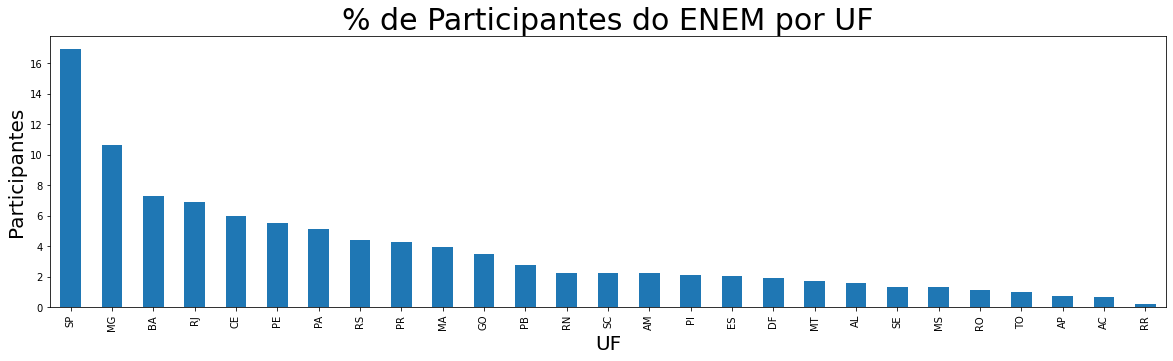

In [16]:
prop_UF = data['SG_UF_RESIDENCIA'].value_counts()/data['SG_UF_RESIDENCIA'].shape[0]*100
prop_UF.plot.bar(figsize=(20,5))
plt.title('% de Participantes do ENEM por UF', fontsize=30)
plt.xlabel('UF', fontsize=20)
plt.ylabel('Participantes', fontsize=20)

## Factor 2: Age

### Conferindo a distribuição dos alunos por faixa etária

In [17]:
data['NU_IDADE'].value_counts().sort_index()

10.0       6
11.0      11
12.0      40
13.0     272
14.0    5625
        ... 
87.0       2
88.0       1
89.0       1
90.0       1
98.0       1
Name: NU_IDADE, Length: 82, dtype: int64

C:\Users\cof2\anaconda3\envs\ufpe\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


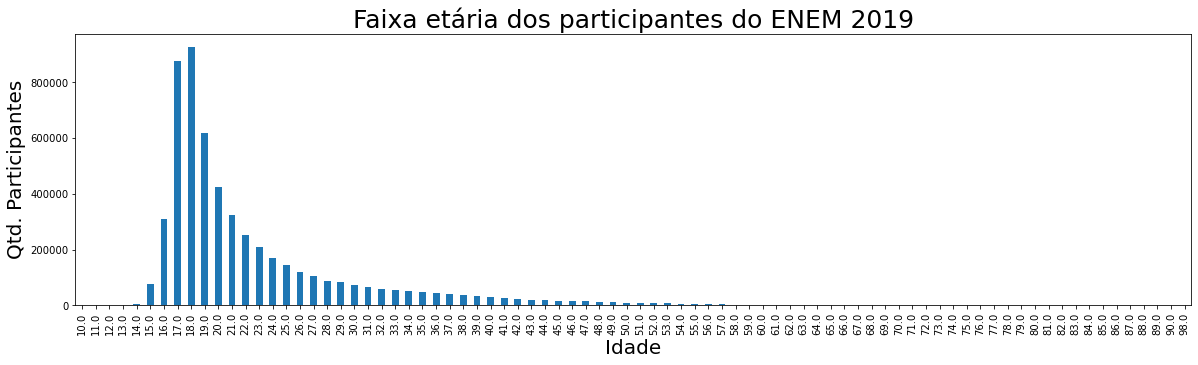

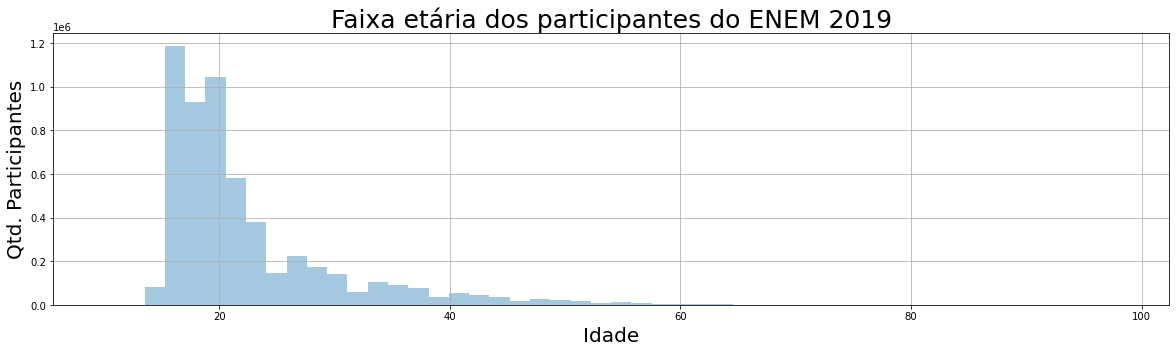

In [18]:
## Gráfico de Barras 
data['NU_IDADE'].value_counts().sort_index().plot.bar(figsize=(20,5))
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Faixa etária dos participantes do ENEM 2019', fontsize=25)

## Gráficos tipo Histograma
plt.figure(figsize=(20,5))
sns.distplot(data['NU_IDADE'], kde=False)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Faixa etária dos participantes do ENEM 2019', fontsize=25)
plt.grid()

### Podemos observar que a maior parte dos alunos que fazem o ENEM estão entre 16 e 25 anos

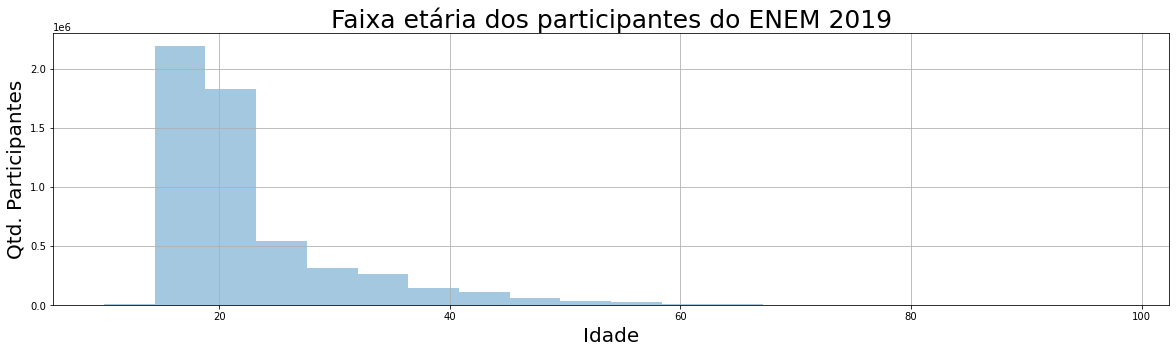

In [19]:
#Seaborn
plt.figure(figsize=(20,5))
sns.distplot(data['NU_IDADE'], kde=False,bins=20)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Faixa etária dos participantes do ENEM 2019', fontsize=25)
plt.grid()

### Conferindo a proporção de cada idade dentro do total de participantes:

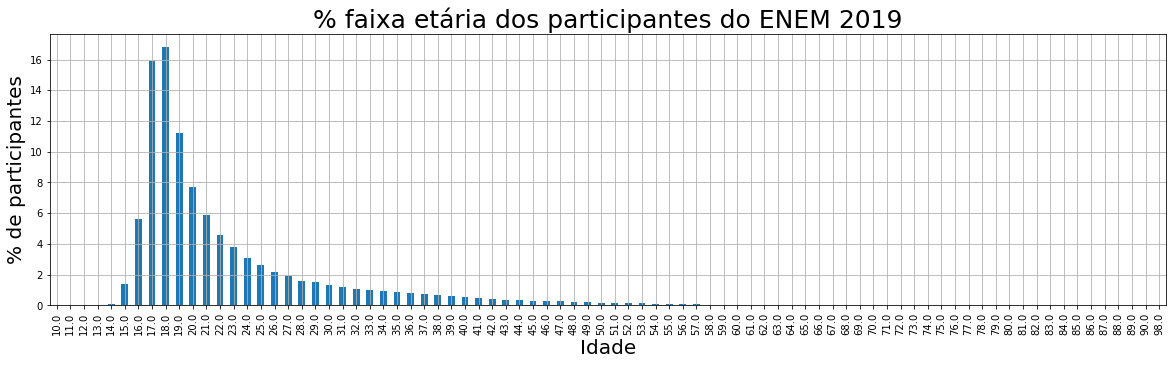

In [20]:
proprocao_idade = data['NU_IDADE'].value_counts().sort_index()/data.shape[0]*100 
proprocao_idade.plot.bar(figsize=(20,5))
plt.xlabel('Idade', fontsize=20)
plt.ylabel('% de participantes', fontsize=20)
plt.title('% faixa etária dos participantes do ENEM 2019', fontsize=25)
plt.grid()

### Faixa etária dos treineiros

Existe uma categoria de participantes no ENEM chamada ***Treineiro***, referente ao aluno que realiza a prova como qualquer outro participante sem entrar no processo de seleção de vestibular. 

O objetivo deste candidato é ganhar experiência e se preparar para o exame em anos seguintes.

Observa-se nos dados que existem participantes com idade inferior a esperada para a prova (17 a 18 anos). 

Vamos verificar quantos desses participantes são ou não treineiros:

Text(0.5, 1.0, 'Distribuição Etária dos Participantes do ENEM 2019')

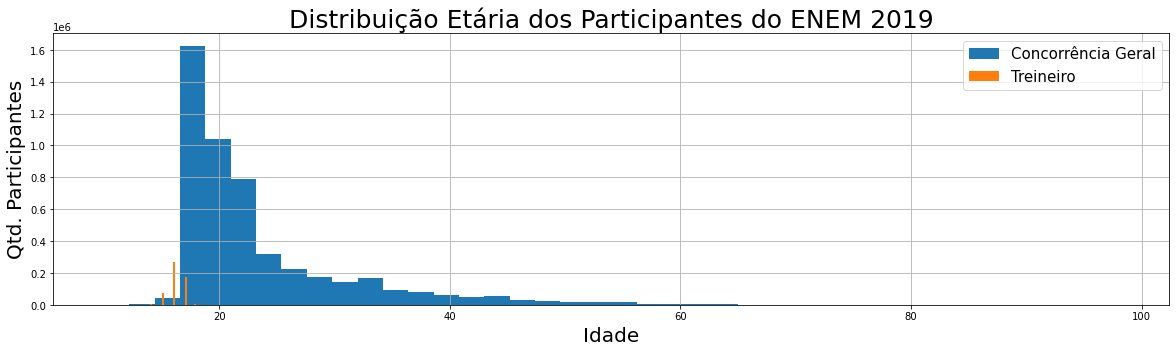

In [21]:
treineiro_sim = data.loc[data['IN_TREINEIRO']==1, 'NU_IDADE']
treineiro_nao = data.loc[data['IN_TREINEIRO']==0, 'NU_IDADE']

treineiro_nao.hist(bins=40,figsize=(20,5), label='Concorrência Geral')
treineiro_sim.hist(bins=40,figsize=(20,5), label='Treineiro')
plt.legend(fontsize=15)
plt.xlabel('Idade', fontsize=20)
plt.ylabel('Qtd. Participantes', fontsize=20)
plt.title('Distribuição Etária dos Participantes do ENEM 2019', fontsize=25)

### Vemos que a maioria dos candidatos que prestam a prova como treineiros possuem menos de 20 anos.

## Factor 3: Sex

In [22]:
data['TP_SEXO'].value_counts().sort_index()

F    3257703
M    2256044
Name: TP_SEXO, dtype: int64

In [35]:
def graficoSexo(data):
  #Gera gráfico de pizza mostrando o quantitaivo de homens e mulheres
  mulheres = data[data['TP_SEXO'] == 'F']['TP_SEXO'].count()
  homens = data[data['TP_SEXO'] == 'M']['TP_SEXO'].count()
  qtdImoveis = [mulheres, homens]
  tipos = ['Mulher', 'Homem']
  plt.pie(qtdImoveis, labels=tipos, explode=[0.03,0.03], startangle=90, shadow=True, autopct='%1.1f%%', textprops={'color':"white"})
  plt.title("Quantitativo Homem x Mulher", color = 'white')
  plt.show()

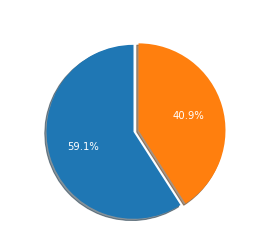

In [36]:
graficoSexo(data)

## Factor 4: Marital status

In [37]:
data['TP_ESTADO_CIVIL'].value_counts().sort_index()

0.0    4748654
1.0     468245
2.0      71890
3.0       7321
Name: TP_ESTADO_CIVIL, dtype: int64

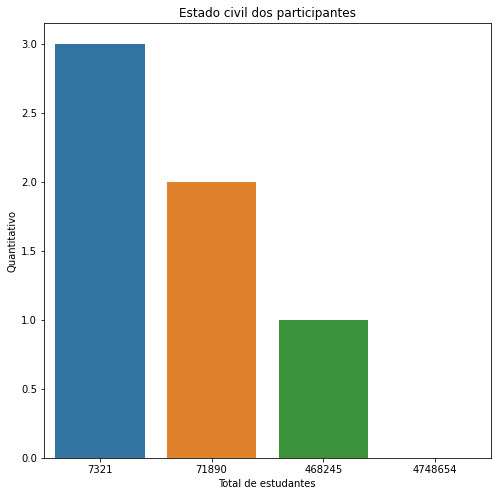

In [52]:
plt.figure(figsize=(8,8))
counts = data['TP_ESTADO_CIVIL'].value_counts()
ax = sns.barplot(y=counts.index,x=counts, orient='v')
plt.title('Estado civil dos participantes')
plt.xlabel('Total de estudantes')
plt.ylabel('Quantitativo')
plt.show()

### Factor 5: Ethnicity

In [50]:
data['TP_COR_RACA'].value_counts().sort_index()

0     114434
1    1981657
2     698694
3    2561318
4     123611
5      34033
Name: TP_COR_RACA, dtype: int64

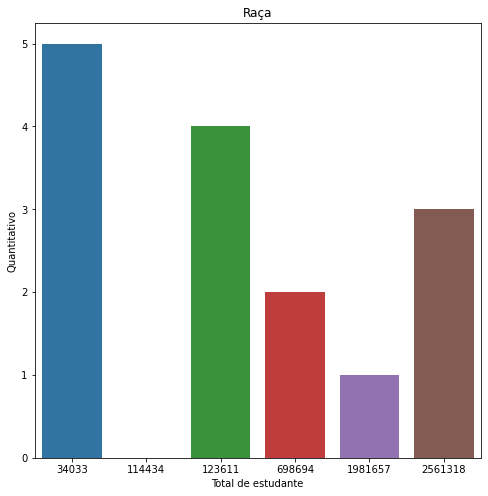

In [53]:
plt.figure(figsize=(8,8))
counts = data['TP_COR_RACA'].value_counts()
ax = sns.barplot(y=counts.index,x=counts, orient='v')
plt.title('Raça')
plt.xlabel('Total de estudante')
plt.ylabel('Quantitativo')
plt.show()

Observa-se que a maior parte dos alunos declarou ser de raça indígena. Enquanto a minoria declrou pertencer à raça branca

# Factor 5: Parents’ education level

### 5.1 Father's education level

In [84]:
from pandas.api.types import CategoricalDtype
father_education_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)
mother_education_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)

father_profession_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
mother_profession_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)

parents_income_dtype = CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ordered=True)


In [56]:
data['Q001'].value_counts().sort_index()

A     325043
B    1267055
C     794560
D     641010
E    1384876
F     383847
G     224607
H     492749
Name: Q001, dtype: int64

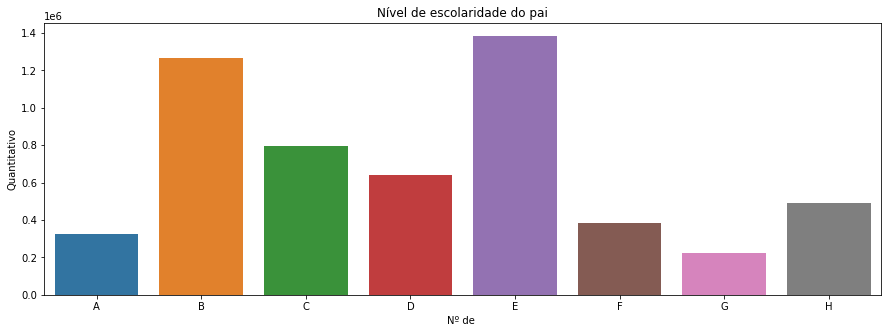

In [75]:
plt.figure(figsize=(15,5))
plt.title("Nível de escolaridade do pai")
ax = sns.countplot(x=data['Q001'].astype(father_education_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

### 5.2 Mother's education level

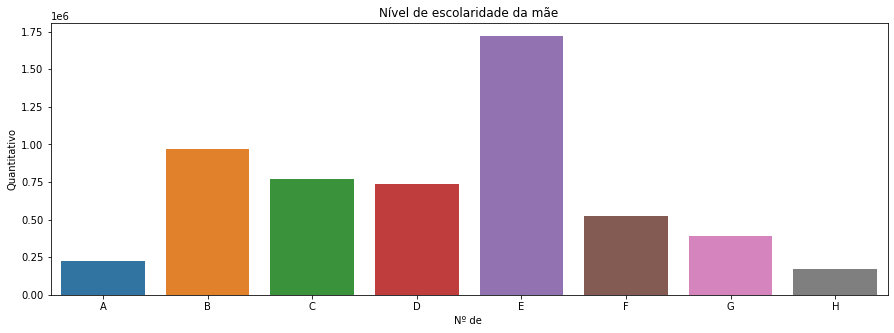

In [76]:
plt.figure(figsize=(15,5))
plt.title("Nível de escolaridade da mãe")
ax = sns.countplot(x=data['Q002'].astype(mother_education_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

## 6 - Factor Parental profession

### 6.1 Profissão do pai (Q003)

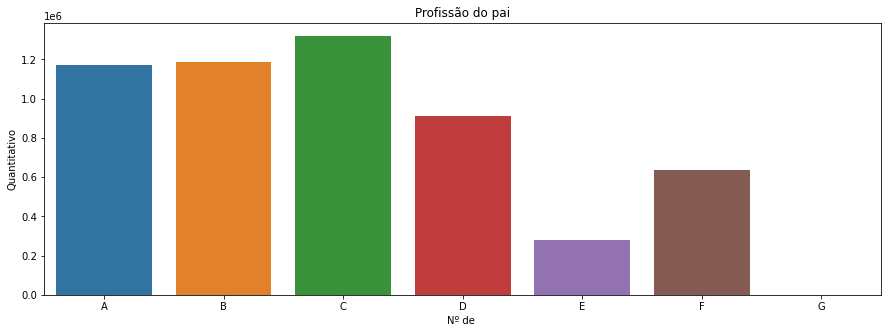

In [85]:
plt.figure(figsize=(15,5))
plt.title("Profissão do pai")
ax = sns.countplot(x=data['Q003'].astype(father_profession_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

### 6.2 Profissão da mãe (Q004)

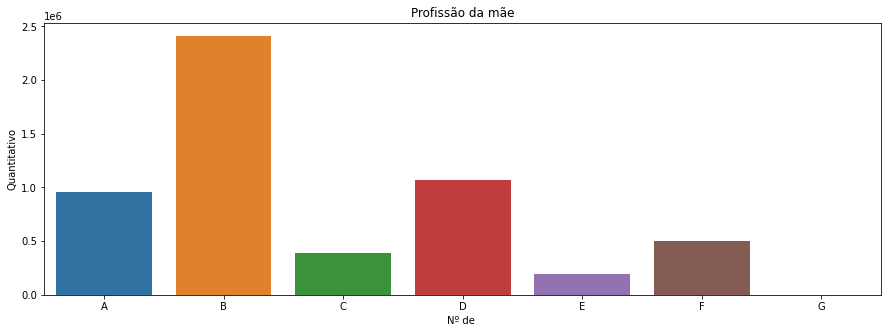

In [86]:
plt.figure(figsize=(15,5))
plt.title("Profissão da mãe")
ax = sns.countplot(x=data['Q004'].astype(mother_profession_dtype).sort_values(ascending=True))
# ax.yaxis.set_major_formatter(tkr.FuncFormatter(formatador_de_milhares))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

## Factor 7: Income

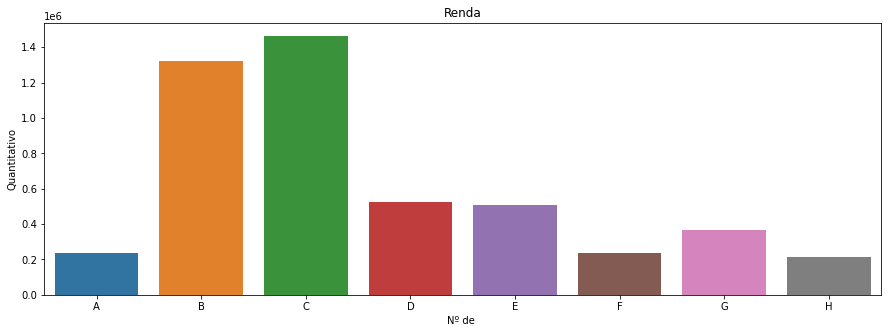

In [81]:
plt.figure(figsize=(15,5))
plt.title("Renda")
ax = sns.countplot(x=data['Q006'].astype(mother_education_dtype).sort_values(ascending=True))
plt.xlabel('Nº de ')
plt.ylabel('Quantitativo')
plt.show()

## Factor 8: socioeconomic status (SES)

It measures the amount of itens selected

### Vamos avaliar a distribuição de notas por cada prova.

Alguns exemplos são a distribuição das notas na prova de redação e linguagem e comunicação:

Text(0.5, 1.0, 'Distribuição de notas de MT')

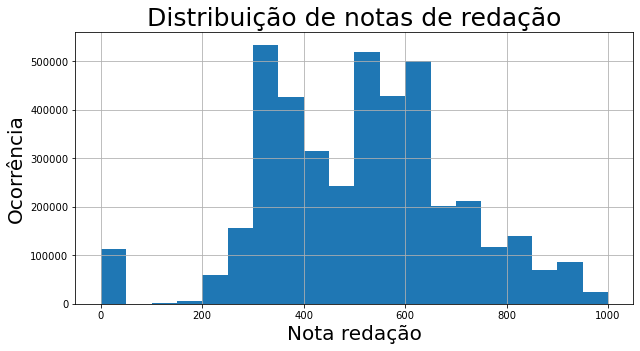

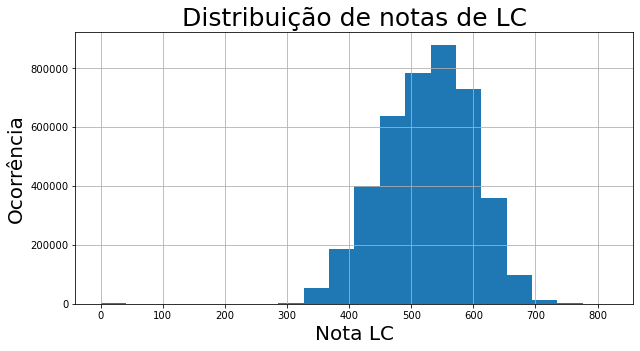

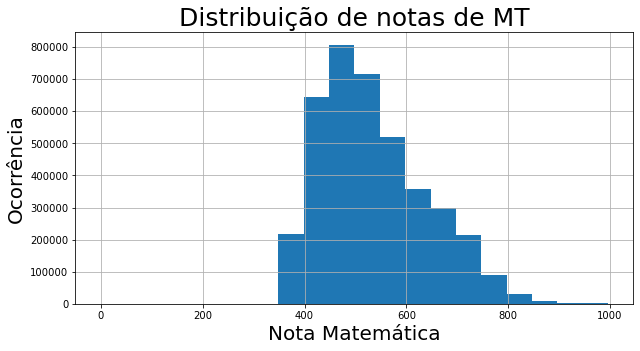

In [23]:
# Histograma notas redação)
plt.figure()
data['NU_NOTA_REDACAO'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota redação', fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de redação',fontsize=25)

plt.figure()
data['NU_NOTA_LC'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota LC',fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de LC',fontsize=25)

plt.figure()
data['NU_NOTA_MT'].hist(bins=20, figsize=(10,5))
plt.xlabel('Nota Matemática',fontsize=20)
plt.ylabel('Ocorrência',fontsize=20)
plt.title('Distribuição de notas de MT',fontsize=25)

In [24]:
provas = ['NU_NOTA_LC', 'NU_NOTA_REDACAO']
data[provas].describe()

,NU_NOTA_LC,NU_NOTA_REDACAO
count,4.148264e+06,4.148264e+06
mean,5.264538e+02,5.086806e+02
std,7.349787e+01,1.874965e+02
min,0.000000e+00,0.000000e+00
25%,4.759000e+02,3.600000e+02
50%,5.313000e+02,5.200000e+02
75%,5.797000e+02,6.200000e+02
max,8.169000e+02,1.000000e+03


<AxesSubplot:>

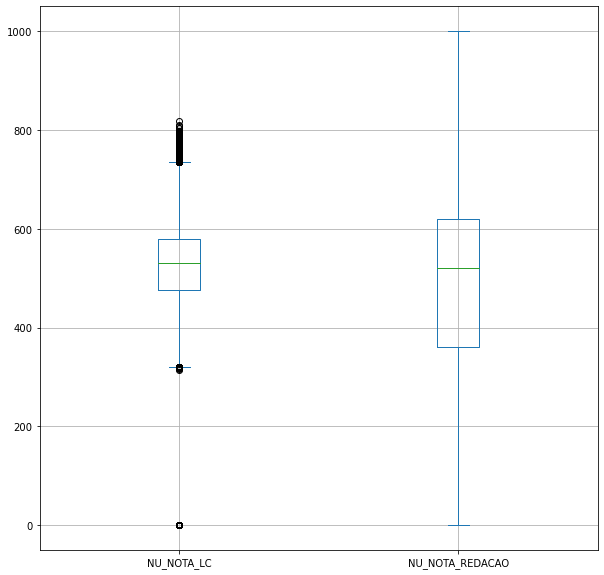

In [25]:
data[provas].plot.box(figsize=(10,10), grid=True)

In [26]:
provas_mt = ['NU_NOTA_MT']
data[provas_mt].describe()

,NU_NOTA_MT
count,3.905099e+06
mean,5.354056e+02
std,1.031512e+02
min,0.000000e+00
25%,4.553000e+02
50%,5.166000e+02
75%,6.007000e+02
max,9.961000e+02


<AxesSubplot:>

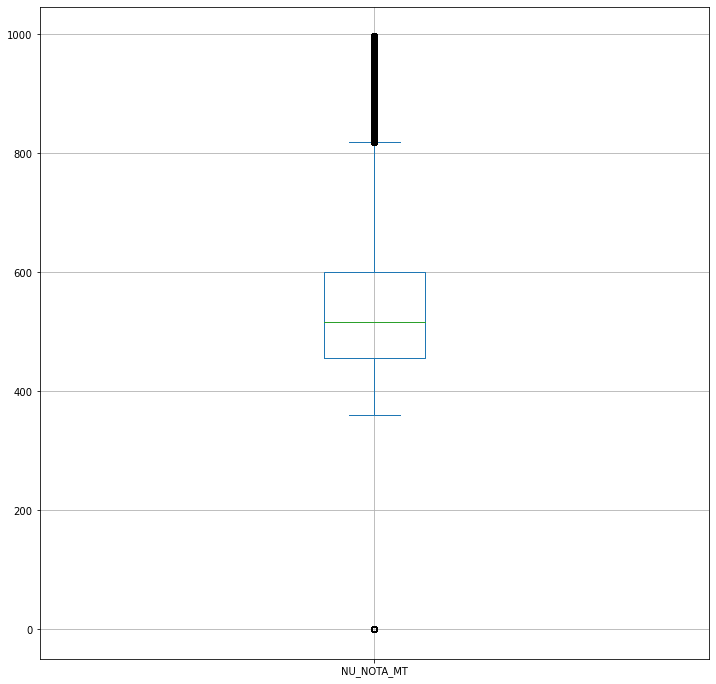

In [27]:
data[provas_mt].plot.box(figsize=(12,12), grid=True)